In [1]:
import numpy as np

In [4]:
x = np.array([1, 2, 3])

print(x.__class__)
print(x.shape)
print(x.ndim)

<class 'numpy.ndarray'>
(3,)
1


In [5]:
W = np.array([[1,2,3], [4,5,6]])
print(W.shape)
print(W.ndim)

(2, 3)
2


In [6]:
W = np.array([[1,2,3], [4,5,6]])
X = np.array([[0,1,2], [3,4,5]])

print(W + X)
print(W * X)

[[ 1  3  5]
 [ 7  9 11]]
[[ 0  2  6]
 [12 20 30]]


In [7]:
A = np.array([[1,2], [3,4]])
print(A * 10)

[[10 20]
 [30 40]]


In [8]:
A = np.array([[1,2], [3,4]])
b = np.array([10, 20])
A * b

array([[10, 40],
       [30, 80]])

In [9]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
np.dot(a, b)

np.int64(32)

In [10]:
A = np.array([[1,2], [3,4]])
B = np.array([[5,6], [7,8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [13]:
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
x = np.random.randn(10, 2)
h = np.dot(x, W1) + b1

print(np.dot(x, W1).shape)
print(h)

(10, 4)
[[ 1.73360967  1.21267991 -0.59726798 -0.31275142]
 [ 1.73889566  1.0532075  -0.40550253 -0.27970058]
 [ 1.11117059 -0.31469527  0.29320265 -1.27814681]
 [ 1.8326737   1.20468206 -0.44875909 -0.12291807]
 [ 1.37502187 -0.01978116  0.32323303 -0.8181093 ]
 [ 2.60114452  2.75145355 -1.15635857  1.11781897]
 [ 0.75333024 -1.39869033  1.04314233 -1.8034778 ]
 [ 1.45837698  0.76554542 -0.46734656 -0.77252853]
 [ 1.22971745 -0.24224133  0.37610616 -1.0628004 ]
 [ 0.97666283 -1.05058858  0.95473187 -1.42827891]]


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.random.randn(10, 2)
W1 = np.random.randn(2,4)
b1 = np.random.randn(4)
W2 = np.random.randn(4, 3)
b2 = np.random.randn(3)

h = np.dot(x, W1) + b1
a = sigmoid(h)
s = np.dot(a, W2) + b2

s

array([[-2.38544055, -2.43028504, -0.01327088],
       [-2.47272315, -2.4314212 , -0.28652599],
       [-2.68891939, -2.39572533, -0.99151795],
       [-1.59470578, -1.64724362, -1.44001363],
       [-2.78134379, -2.38971425, -1.24373124],
       [-2.42388976, -2.43172776, -0.1323378 ],
       [-2.68275702, -2.53128667, -0.33419347],
       [-1.6187695 , -1.99916946, -0.47321421],
       [-2.68393223, -2.26616817, -1.48441561],
       [-2.20748038, -2.31417537, -0.24438515]])

In [15]:
class Sigmoid:
    def __init__(self):
        self.params = []
    
    def forward(self, x):
        return 1 / (1 + np.exp(-x))

In [16]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
    
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        return out

In [17]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        W1 = np.random.randn(I, H)
        b1 = np.random.randn(H)
        W2 = np.random.randn(H, O)
        b2 = np.random.randn(O)
        
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        
        self.params = []
        for layer in self.layers:
            self.params += layer.params
            
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

In [20]:
x = np.random.randn(10, 2)
model = TwoLayerNet(2, 4, 3)
s = model.predict(x)
s

array([[-0.92529081, -2.61951521,  1.26531198],
       [-1.31270945, -2.63077122,  1.23165011],
       [-0.53279349, -2.60540579,  1.23491534],
       [-0.61253079, -2.42078141,  1.29084479],
       [-0.62105161, -2.70218951,  1.18445457],
       [-1.10385868, -2.78794247,  1.23804147],
       [ 0.42787666, -2.19636709,  1.23226501],
       [-1.63288087, -2.73559969,  1.18760493],
       [-0.40433819, -2.58010161,  1.2167164 ],
       [-0.17840108, -2.44829414,  1.25108186]])

In [21]:
D, N = 8, 7
x = np.random.randn(N, D)
y = np.sum(x, axis=0, keepdims=True)

dy = np.random.randn(1, D)
dx = np.repeat(dy, N, axis=0) # backward

In [22]:
D, N = 8, 7
x = np.random.randn(1, D)
y = np.repeat(x, N, axis=0)

dy = np.random.rand(N, D)
dx = np.sum(dy, axis=0, keepdims=True) # backward

In [23]:
class MatMul:
    def __init__(self, W):
        self.params = [W]
        self.grads = [np.zeros_like(W)]
        self.x = None
        
    def forward(self, x):
        W, = self.params
        out = np.dot(x, W)
        self.x = x
        return out
    
    def backward(self, dout):
        W, = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        self.grads[0][...] = dW
        return dx

In [24]:
class Sigmoid:
    def __init__(self):
        self.params, self.grads = [], []
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        return dx

In [25]:
class Affine:
    def __init__(self, W, b):
        self.params = [W, b]
        self.grads = [np.zeros_like(W), np.zeros_like(b)]
        self.x = None
        
    def forward(self, x):
        W, b = self.params
        out = np.dot(x, W) + b
        self.x = x
        return out
    
    def backward(self, dout):
        W, b = self.params
        dx = np.dot(dout, W.T)
        dW = np.dot(self.x.T, dout)
        db = np.sum(dout, axis=0)
        
        self.grads[0][...] = dW
        self.grads[1][...] = db
        return dx
    

In [26]:
class SGD:
    def __init__(self, lr=0.01):
        self.lr = lr
        
    def update(self, params, grads):
        for i in range(len(params)):
            params[i] -= self.lr * grads[i]

In [28]:
import sys
sys.path.append('..')
from nndataset import spiral
!pip3 install matplotlib
import matplotlib.pyplot as plt

x, t = spiral.load_data()
print('x', x.shape)
print('t', t.shape)

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/da/36/236fbd868b6c91309a5206bd90c3f881f4f44b2d997cd1d6239ef652f878/matplotlib-3.9.4-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ec/22/19f5b948367ab5260fb41d842c7a78dae645603881ea6bc39738bcfcabf6/contourpy-1.3.0-cp39-cp39-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/c2/a0/c62b7f219f74f0e9c4b7662c269b360f5c380cf7dfabaff06e114acc5576/fonttools-4.56.0-cp39-cp39-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 846.8 kB/s eta 0:00:00a 0:00:01
  Obtaining dependency inform

In [35]:
import sys
sys.path.append('..')
import numpy as np
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size

        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)

        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()

        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads

    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss

    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

| epoch 1 | iter 10 / 10 | loss 1.13
| epoch 2 | iter 10 / 10 | loss 1.13
| epoch 3 | iter 10 / 10 | loss 1.12
| epoch 4 | iter 10 / 10 | loss 1.12
| epoch 5 | iter 10 / 10 | loss 1.11
| epoch 6 | iter 10 / 10 | loss 1.14
| epoch 7 | iter 10 / 10 | loss 1.16
| epoch 8 | iter 10 / 10 | loss 1.11
| epoch 9 | iter 10 / 10 | loss 1.12
| epoch 10 | iter 10 / 10 | loss 1.13
| epoch 11 | iter 10 / 10 | loss 1.12
| epoch 12 | iter 10 / 10 | loss 1.11
| epoch 13 | iter 10 / 10 | loss 1.09
| epoch 14 | iter 10 / 10 | loss 1.08
| epoch 15 | iter 10 / 10 | loss 1.04
| epoch 16 | iter 10 / 10 | loss 1.03
| epoch 17 | iter 10 / 10 | loss 0.96
| epoch 18 | iter 10 / 10 | loss 0.92
| epoch 19 | iter 10 / 10 | loss 0.92
| epoch 20 | iter 10 / 10 | loss 0.87
| epoch 21 | iter 10 / 10 | loss 0.85
| epoch 22 | iter 10 / 10 | loss 0.82
| epoch 23 | iter 10 / 10 | loss 0.79
| epoch 24 | iter 10 / 10 | loss 0.78
| epoch 25 | iter 10 / 10 | loss 0.82
| epoch 26 | iter 10 / 10 | loss 0.78
| epoch 27 | iter 10 

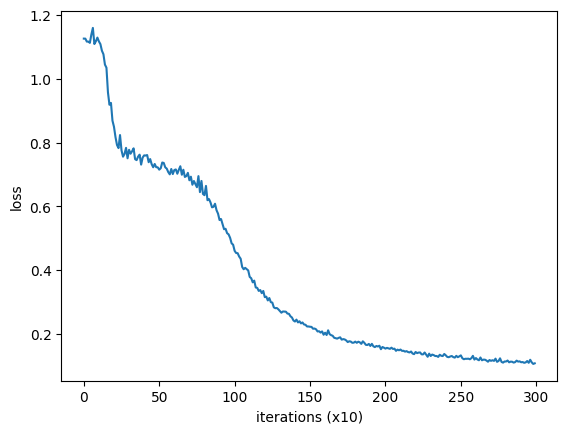

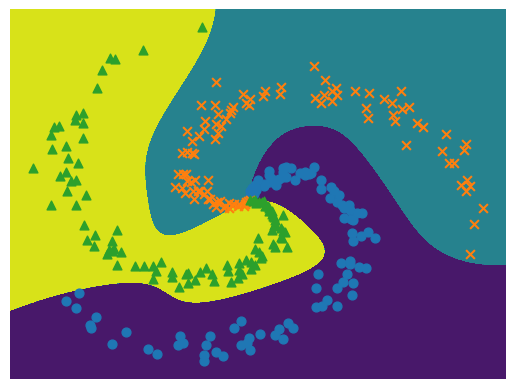

In [36]:
from common.optimizer import SGD
from nndataset import spiral
import matplotlib.pyplot as plt

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]
        
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| epoch {epoch+1} | iter {iters+1} / {max_iters} | loss {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0
            

plt.plot(np.arange(len(loss_list)), loss_list, label='train')
plt.xlabel('iterations (x10)')
plt.ylabel('loss')
plt.show()

h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)
plt.contourf(xx, yy, Z)
plt.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    plt.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])
plt.show()

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

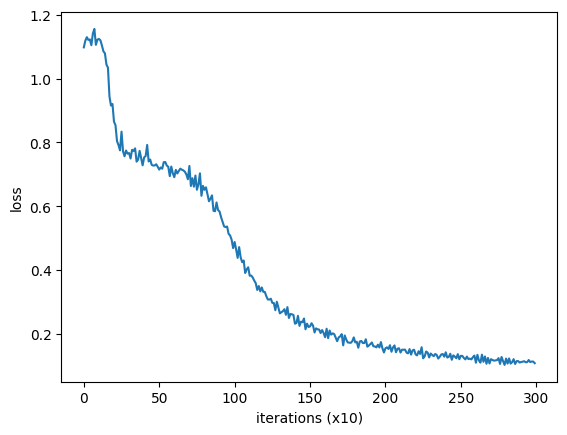

In [37]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from nndataset import spiral

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)
trainer.plot()